# 第5章 線形系回帰予測を行う10本ノック

![](2022-09-19-07-01-20.png)

![](2022-09-19-07-02-24.png)

https://note.nkmk.me/python-f-strings/

## ノック41:データを加工しよう

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd 
#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)

df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV']=boston.target 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
X=df[boston.feature_names]
y=df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


## ノック42:データをスケーリングしよう

In [56]:
#標準化　平均が0、標準偏差が１となるようにスケーリング 正規分布に使う
#正規化　０〜１に値が収まるようにスケーリング　一様分布に使う
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])


[[-0.20735619 -0.49997924  1.54801583 -0.26360274  0.58821309 -1.83936729
   1.10740225 -1.1251102  -0.61816013  0.20673466  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 -0.26360274 -0.79782145  0.32748658
  -0.36766106  0.07509    -0.73363701 -1.04949303  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 -0.26360274  0.58821309  0.03790703
   1.04311378 -0.79998434 -0.61816013  0.20673466  1.2272573   0.39846135
   0.63936662]]
[[-0.45379523 -0.45888196 -1.2285158  -0.29277002 -0.7850976   0.14806054
  -1.7758721   0.61364717 -0.68477673  0.04137254 -0.74998219  0.26955997
  -0.79993845]
 [ 0.55063352 -0.45888196  1.04438686 -0.29277002  0.68330592 -0.0188666
   1.14170823 -1.23391041  1.59531227  1.49212109  0.88492032  0.18133643
  -0.49829647]
 [-0.44864325 -0.45888196  0.40044876  3.41565026 -0.01225364  0.20512964
   0.873911   -0.23183135 -0.57077228 -0.90530236 -0.99769469  0.4499995
  -0.36469248]]


## ノック43:重回帰モデルを構築しよう

In [57]:
from sklearn.linear_model import LinearRegression

multi_reg=LinearRegression().fit(X_train_scaled,y_train)

In [58]:
y_train_pred = multi_reg.predict(X_train_scaled)
y_test_pred = multi_reg.predict(X_test_scaled)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])


354
[[ 4.58009023]
 [28.38354012]
 [17.27775551]
 [29.39070404]
 [20.54476971]]
152
[[26.00247623]
 [24.12967879]
 [30.19850019]
 [12.66547763]
 [22.31194771]]


## ノック44:重回帰モデルを評価しよう

ValueError: x and y must be the same size

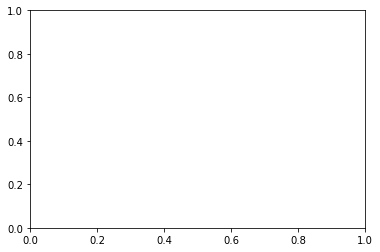

In [59]:
from cProfile import label
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.scatter(X_train,y_train_pred, label='train')
plt.scatter(X_test,y_test_pred,label='test')
plt.xlabel('X')
plt.ylabel('y')
plt.title('multi_reg')
plt.legend()
plt.show()

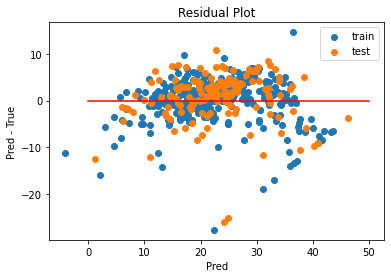

In [ ]:
  def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
    plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
    plt.plot([0, 50], [0,0] ,color="red")
    plt.xlabel("Pred")
    plt.ylabel("Pred - True")
    plt.title("Residual Plot")
    plt.legend()
    plt.show()

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

def get_eval_score(y_true,y_pred):
    
      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.103606103908004
  MSE = 19.958219814238046
  RMSE = 4.4674623461466405
  R2 = 0.7645451026942549
テストデータスコア
  MAE = 3.8653885902456655
  MSE = 28.381910439048223
  RMSE = 5.3274675446264546
  R2 = 0.6591396211105127


## ノック45:各説明変数の重みを確認しよう

![](2022-09-23-06-48-02.png)

In [ ]:
for i, (col,coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
    print(f'w{i}({col}) = {coef}')
print(f'b={multi_reg.intercept_[0]}')

w0(CRIM) = -1.0119005895981474
w1(ZN) = 1.0502802743032749
w2(INDUS) = 0.07920966467269175
w3(CHAS) = 0.6189619959077612
w4(NOX) = -1.8736910171630718
w5(RM) = 2.705269785111315
w6(AGE) = -0.2795726389182987
w7(DIS) = -3.097664863869059
w8(RAD) = 2.0968999836727584
w9(TAX) = -1.8860633909786864
w10(PTRATIO) = -2.2611046607987677
w11(B) = 0.5826430949043825
w12(LSTAT) = -3.4404983779426304
b=22.7454802259887


## ノック46:LASSO回帰モデルを構築しよう

正則化項　L1ノルム　変数の重みを０に近づけるとともに特定の変数の重みを完全に０にする

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled,y_train)

In [ ]:
y_train_pred=lasso.predict(X_train_scaled)
y_test_pred=lasso.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5]) 

[ 5.03643518 25.9286159  18.46752392 29.47865897 18.4365082 ]
[27.21459859 22.6149087  26.441333   14.44652064 22.9168076 ]


In [ ]:
y_train_pred=np.expand_dims(y_train_pred,1)
y_test_pred=np.expand_dims(y_test_pred,1)

print(y_train_pred[:5])
print(y_test_pred[:5])

[[ 5.03643518]
 [25.9286159 ]
 [18.46752392]
 [29.47865897]
 [18.4365082 ]]
[[27.21459859]
 [22.6149087 ]
 [26.441333  ]
 [14.44652064]
 [22.9168076 ]]


## ノック47:LASSO回帰モデルを評価しよう

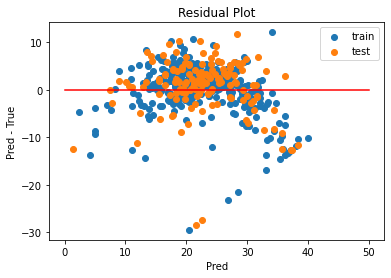

In [ ]:
residual_plot(y_train_pred,y_train,y_test_pred,y_test)

In [ ]:
print('訓練データスコア')
get_eval_score(y_train,y_train_pred)
print('テストデータスコア')
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.5699072408087855
  MSE = 26.04321595909546
  RMSE = 5.103255427577133
  R2 = 0.6927580317165543
テストデータスコア
  MAE = 4.149505755346782
  MSE = 34.10311193471499
  RMSE = 5.839786976826722
  R2 = 0.5904292742963301


In [ ]:
for i, (col, coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
    print(f'w{i}({col}) = {coef}')
print(f'b={multi_reg.intercept_[0]}')

w0(CRIM) = -1.0119005895981474
w1(ZN) = 1.0502802743032749
w2(INDUS) = 0.07920966467269175
w3(CHAS) = 0.6189619959077612
w4(NOX) = -1.8736910171630718
w5(RM) = 2.705269785111315
w6(AGE) = -0.2795726389182987
w7(DIS) = -3.097664863869059
w8(RAD) = 2.0968999836727584
w9(TAX) = -1.8860633909786864
w10(PTRATIO) = -2.2611046607987677
w11(B) = 0.5826430949043825
w12(LSTAT) = -3.4404983779426304
b=22.7454802259887


![](2022-09-23-07-06-45.png)

## ノック48:LASSO回帰のハイパーパラメータを変更しよう

In [ ]:
lasso_change_param=Lasso(alpha=10).fit(X_train_scaled,y_train)

In [ ]:
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_change_param.coef_)):
    print(f'w{i}({col}) = {coef}')
print(f'b={lasso_change_param.intercept_}')

w0(CRIM) = -0.0
w1(ZN) = 0.0
w2(INDUS) = -0.0
w3(CHAS) = 0.0
w4(NOX) = -0.0
w5(RM) = 0.0
w6(AGE) = -0.0
w7(DIS) = 0.0
w8(RAD) = -0.0
w9(TAX) = -0.0
w10(PTRATIO) = -0.0
w11(B) = 0.0
w12(LSTAT) = -0.0
b=[22.74548023]


## ノック49:交差検証で最適なパラメータを見つけよう

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10]).fit(X_train_scaled, y_train)


/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
print(f"alpha = {lasso_cv.alpha_}")
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_cv.coef_)):
    print(f"w{i}({col}) = {coef}")
print(f"b = {lasso_cv.intercept_}")

alpha = 0.1
w0(CRIM) = -0.7133034000316578
w1(ZN) = 0.7015825573132027
w2(INDUS) = -0.06950534556200688
w3(CHAS) = 0.6039977960951486
w4(NOX) = -1.444227443864161
w5(RM) = 2.8342862608317847
w6(AGE) = -0.0896461992826955
w7(DIS) = -2.345931843873983
w8(RAD) = 0.6393481046889836
w9(TAX) = -0.6573788858076535
w10(PTRATIO) = -2.163676229598883
w11(B) = 0.47238047527334154
w12(LSTAT) = -3.504426838686091
b = 22.7454802259887


In [ ]:
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)


In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.114624214010965
  MSE = 20.417290181302135
  RMSE = 4.51854956609996
  R2 = 0.759129270664182
テストデータスコア
  MAE = 3.876685148034004
  MSE = 29.480085367142166
  RMSE = 5.429556645541344
  R2 = 0.6459507865223366


## ノック50:リッジ回帰でモデルを構築・評価しよう

L2ノルムという正則化項を使用する　重みを０に近づけるが完全に０にはしない<br>
全ての説明変数が重要であるケースはリッジ回帰の方が適していることになる

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train_scaled,y_train)

In [ ]:
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])


[[ 4.62395491]
 [28.33619682]
 [17.31360342]
 [29.40211899]
 [20.44193208]]
[[26.08912497]
 [24.06595743]
 [30.15670256]
 [12.65900708]
 [22.32902563]]


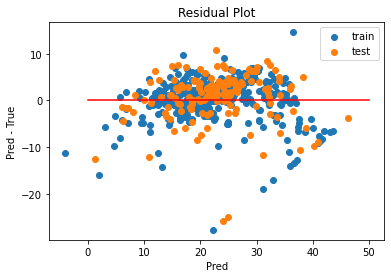

In [ ]:
residual_plot(y_train_pred, y_train, y_test_pred, y_test)


In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.1000682747403814
  MSE = 19.959850066669603
  RMSE = 4.467644800862038
  R2 = 0.7645258699709746
テストデータスコア
  MAE = 3.863662454607766
  MSE = 28.434671983926183
  RMSE = 5.332417086455839
  R2 = 0.6585059667898665


In [ ]:
for i, (col, coef) in enumerate(zip(boston.feature_names, ridge.coef_[0])):
    print(f"w{i}({col}) = {coef}")
print(f"b = {ridge.intercept_[0]}")


w0(CRIM) = -1.0020066322842447
w1(ZN) = 1.0314789920583722
w2(INDUS) = 0.049805093928150516
w3(CHAS) = 0.6237499859394255
w4(NOX) = -1.835262754065177
w5(RM) = 2.7157280094630396
w6(AGE) = -0.285447781469008
w7(DIS) = -3.0588996489767037
w8(RAD) = 2.0115911281842185
w9(TAX) = -1.806510841976024
w10(PTRATIO) = -2.251976581476515
w11(B) = 0.5829303480062246
w12(LSTAT) = -3.424557498235147
b = 22.7454802259887


![](2022-09-23-07-19-22.png)

![](2022-09-23-07-19-49.png)